In [2]:
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import itertools

import keras
from keras.applications import ResNet50, Xception
from keras.models import Sequential, Model
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from keras import backend as K
#from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
import pickle
from datetime import datetime

np.random.seed(123)

2025-07-20 22:05:28.644790: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 22:05:28.649565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 22:05:28.664432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753045528.688872   19215 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753045528.696292   19215 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753045528.715114   19215 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
#Lesion Dictionary
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

base_skin_dir = '../data/'
#Dictionary for Image Names
imageid_path_dict = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob(os.path.join(base_skin_dir, 'HAM10000_images_part_*', '*.jpg'))
}
#Read File csv
df = pd.read_csv('../data/HAM10000_metadata.csv')
#Create useful Columns - Images Path, Lesion Type and Lesion Categorical Code
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

In [4]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../data/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../data/HAM10000_images_part_2/ISIC_0033084.jpg,Actinic keratoses,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../data/HAM10000_images_part_2/ISIC_0033550.jpg,Actinic keratoses,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../data/HAM10000_images_part_2/ISIC_0033536.jpg,Actinic keratoses,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../data/HAM10000_images_part_2/ISIC_0032854.jpg,Actinic keratoses,0


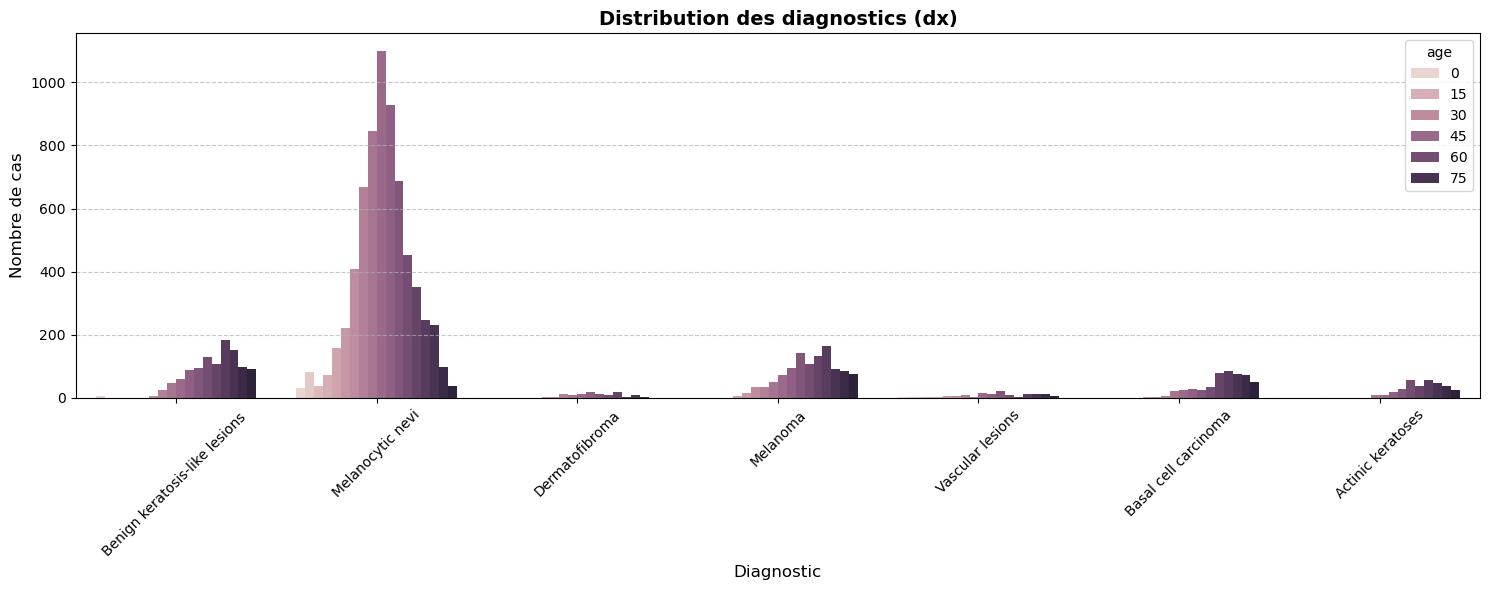

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='cell_type', hue='age')

ax.set_title('Distribution des diagnostics (dx)', fontsize=14, fontweight='bold')
ax.set_xlabel('Diagnostic', fontsize=12)
ax.set_ylabel('Nombre de cas', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [6]:
ff

NameError: name 'ff' is not defined

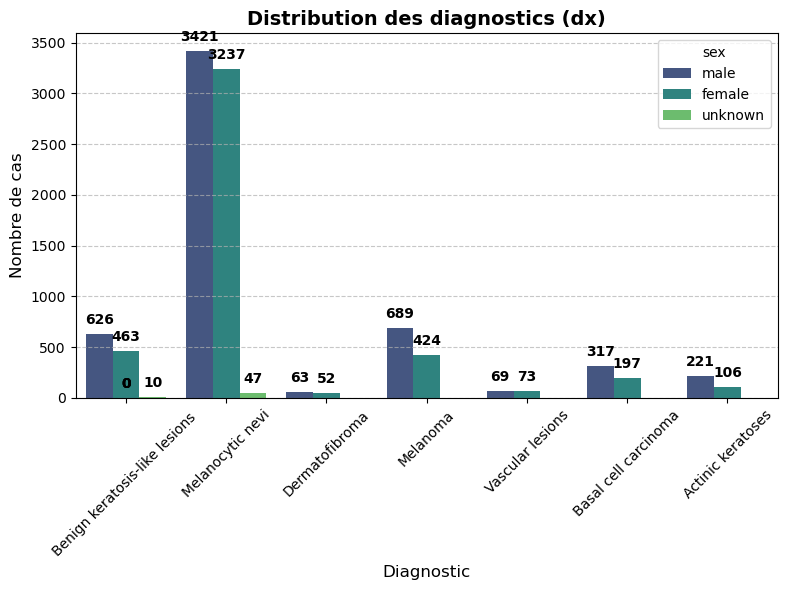

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='cell_type', palette='viridis', hue='sex')

# Afficher les valeurs au-dessus de chaque barre sans virgule
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Convertir en entier
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 5),
        textcoords='offset points'
    )

ax.set_title('Distribution des diagnostics (dx)', fontsize=14, fontweight='bold')
ax.set_xlabel('Diagnostic', fontsize=12)
ax.set_ylabel('Nombre de cas', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


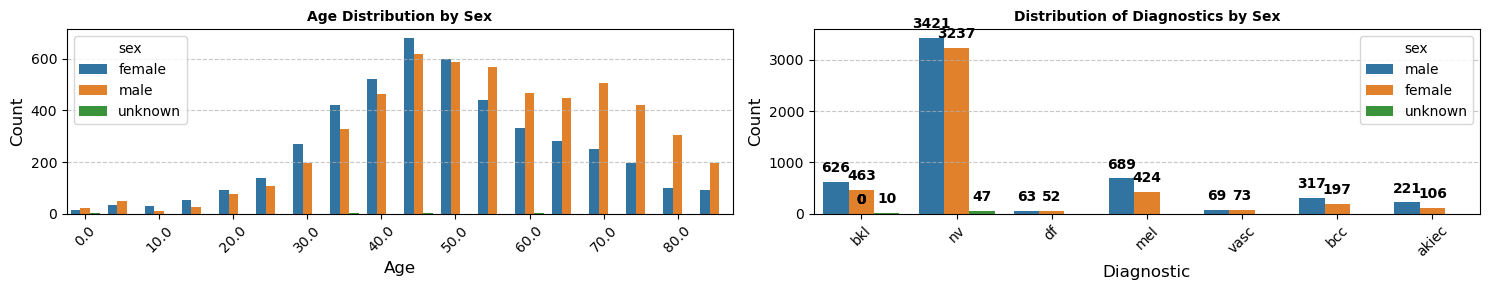

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.countplot(data=df, x='age', hue='sex', ax=axes[0])
axes[0].set_title('Age Distribution by Sex', fontsize=10, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))  

# Second subplot: diagnostic distribution by sex
sns.countplot(data=df, x='dx', hue='sex', ax=axes[1])

# Add value labels on top of each bar
for p in axes[1].patches:
    axes[1].annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 5),
        textcoords='offset points'
    )

axes[1].set_title('Distribution of Diagnostics by Sex', fontsize=10, fontweight='bold')
axes[1].set_xlabel('Diagnostic', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.savefig("../img/data_description.pdf")
plt.show()

In [ ]:
def basic_EDA(df):
    size = df.shape
    sum_duplicates = df.duplicated().sum()
    sum_null = df.isnull().sum().sum()
    is_NaN = df. isnull()
    row_has_NaN = is_NaN. any(axis=1)
    rows_with_NaN = df[row_has_NaN]
    count_NaN_rows = rows_with_NaN.shape
    return print("Number of Samples: %d,\nNumber of Features: %d,\nDuplicated Entries: %d,\nNull Entries: %d,\nNumber of Rows with Null Entries: %d %.1f%%" %(size[0],size[1], sum_duplicates, sum_null,count_NaN_rows[0],(count_NaN_rows[0] / df.shape[0])*100))

def summary_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

def countplot(df, x, x_axis_title,y_axys_title, plot_title):
    plt.figure(figsize=(20,8))
    sns.set(style="ticks", font_scale = 1)
    ax = sns.countplot(data = df,x=x,order = df[x].value_counts().index,palette="Blues_d")
    sns.despine(top=True, right=True, left=True, bottom=False)
    plt.xticks(rotation=0,fontsize = 12)
    ax.set_xlabel(x_axis_title,fontsize = 14,weight = 'bold')
    ax.set_ylabel(y_axys_title,fontsize = 14,weight = 'bold')
    plt.title(plot_title, fontsize = 16,weight = 'bold')  

In [ ]:
summary_table(df)

,Name,dtypes,Missing,Uniques
0,lesion_id,object,0,7470
1,image_id,object,0,10015
2,dx,object,0,7
3,dx_type,object,0,4
4,age,float64,57,18
5,sex,object,0,3
6,localization,object,0,15
7,path,object,0,10015
8,cell_type,object,0,7
9,cell_type_idx,int8,0,7


In [ ]:
basic_EDA(df)

Number of Samples: 10015,
Number of Features: 10,
Duplicated Entries: 0,
Null Entries: 57,
Number of Rows with Null Entries: 57 0.6%


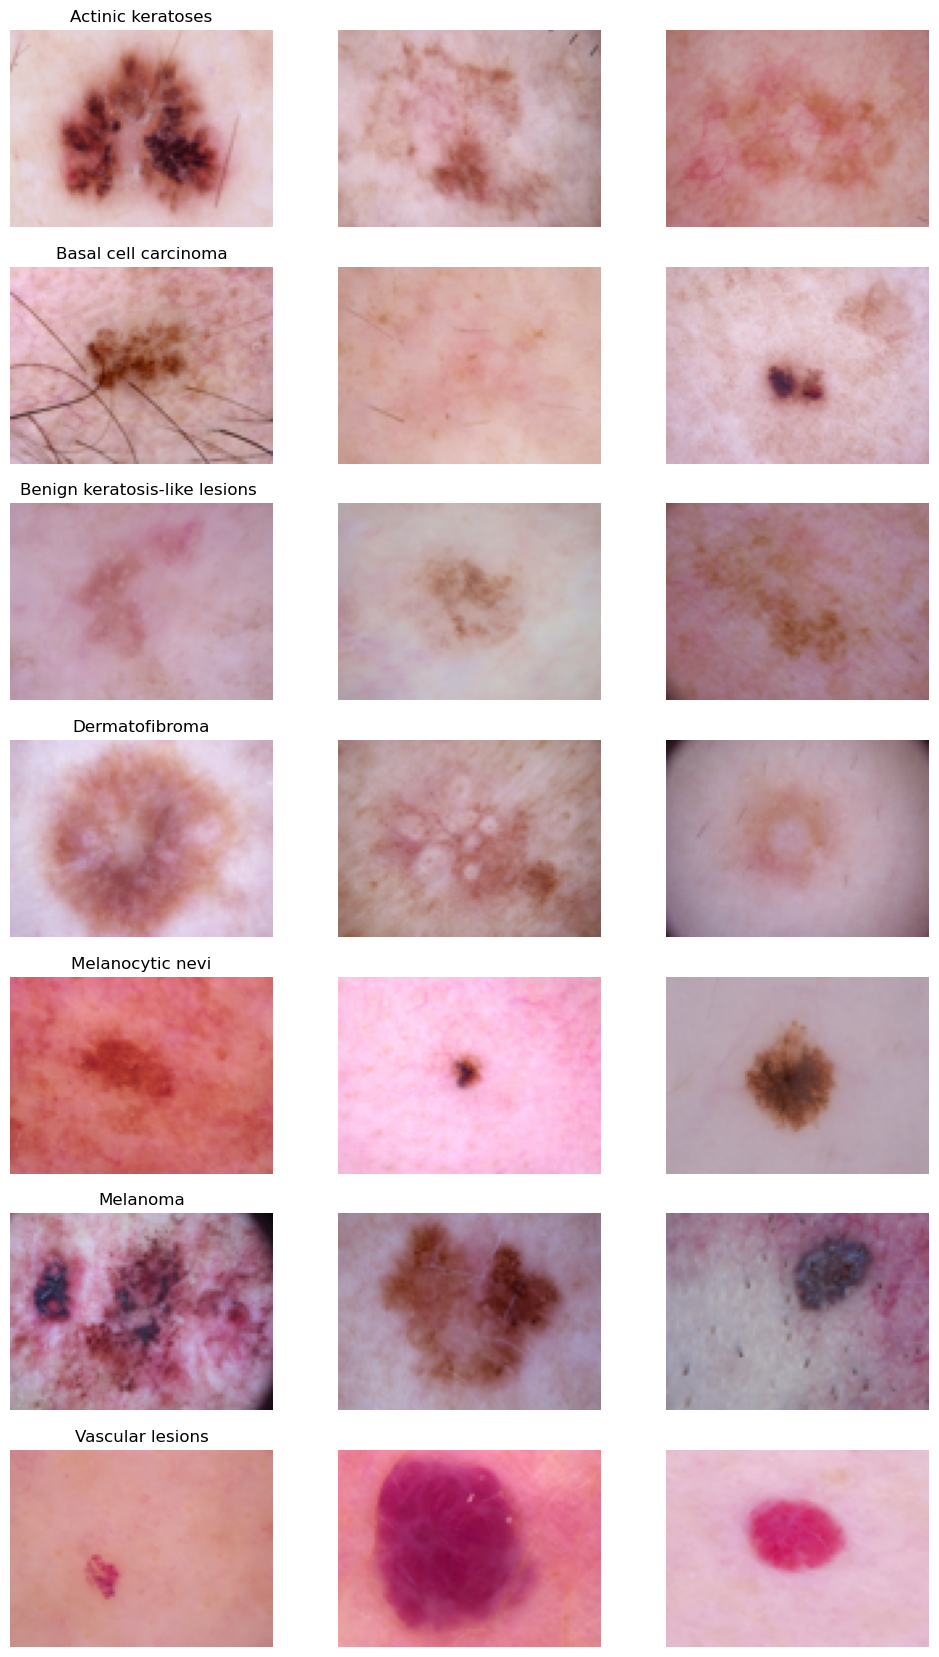

In [ ]:
img = df.sample(n=500,replace=False, random_state=1)
img['image'] = img['path'].map(lambda x: np.asarray(Image.open(x).resize((100,75))))
#Image Sampling
n_samples = 3

fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))

for n_axs, (type_name, type_rows) in zip(m_axs,img.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
df["image"] = df["path"].map(lambda x: np.asarray(Image.open(x).resize((100,75))))

In [ ]:
features = df.drop(columns=[ 'cell_type_idx'], axis=1)
labels = df["cell_type_idx"]

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0027419.jpg,Benign keratosis-like lesions,2,"[[[190, 153, 194], [192, 154, 196], [191, 153,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025030.jpg,Benign keratosis-like lesions,2,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0026769.jpg,Benign keratosis-like lesions,2,"[[[185, 127, 137], [189, 133, 147], [194, 136,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../data/HAM10000_images_part_1/ISIC_0025661.jpg,Benign keratosis-like lesions,2,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../data/HAM10000_images_part_2/ISIC_0031633.jpg,Benign keratosis-like lesions,2,"[[[134, 90, 113], [147, 102, 125], [159, 115, ..."


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(9958, 11)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import os
import pickle

# Exemple de données
# X_img : np.array shape (N, H, W, C) -- tes images prétraitées
# X_tab : np.array shape (N, num_features) -- tes données tabulaires
# y : one-hot encoded labels shape (N, num_classes)
# sensitive_attr : pd.Series ou np.array shape (N,) -- groupe sensible (ex: sexe)

# Normalisation données tabulaires (avant split)
scaler = StandardScaler()
X_tab_scaled = scaler.fit_transform(X_tab)

# Créer dossier pour sauvegarder splits
os.makedirs("data_splits", exist_ok=True)

# Stratified KFold split (exemple 5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_labels = y.argmax(axis=1)

splits = []
for fold, (train_idx, test_idx) in enumerate(skf.split(X_tab_scaled, y_labels)):
    X_train_img, X_test_img = X_img[train_idx], X_img[test_idx]
    X_train_tab, X_test_tab = X_tab_scaled[train_idx], X_tab_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    sens_train, sens_test = sensitive_attr[train_idx], sensitive_attr[test_idx]
    
    # Ici on peut faire un split val à partir de train (ex: 10%)
    val_split = int(0.1 * len(train_idx))
    X_val_img, X_train_img = X_train_img[:val_split], X_train_img[val_split:]
    X_val_tab, X_train_tab = X_train_tab[:val_split], X_train_tab[val_split:]
    y_val, y_train = y_train[:val_split], y_train[val_split:]
    sens_val, sens_train = sens_train[:val_split], sens_train[val_split:]
    
    # Sauvegarde splits
    split_dict = {
        "X_train_img": X_train_img, "X_train_tab": X_train_tab, "y_train": y_train, "sens_train": sens_train,
        "X_val_img": X_val_img, "X_val_tab": X_val_tab, "y_val": y_val, "sens_val": sens_val,
        "X_test_img": X_test_img, "X_test_tab": X_test_tab, "y_test": y_test, "sens_test": sens_test
    }
    
    with open(f"data_splits/fold_{fold}.pkl", "wb") as f:
        pickle.dump(split_dict, f)
        
    splits.append(split_dict)


NameError: name 'X_tab' is not defined

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16, Xception
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_multimodal_model(cnn_name, image_shape, tabular_shape, num_classes,
                           unfreeze_last_n=40, dropout_rate=0.3, dense_units=[128]):
    image_input = Input(shape=image_shape, name="image_input")
    
    if cnn_name == "resnet":
        base_cnn = ResNet50(include_top=False, weights="imagenet", input_tensor=image_input)
    elif cnn_name == "vgg":
        base_cnn = VGG16(include_top=False, weights="imagenet", input_tensor=image_input)
    elif cnn_name == "xception":
        base_cnn = Xception(include_top=False, weights="imagenet", input_tensor=image_input)
    else:
        raise ValueError("Modèle CNN non reconnu")
    
    # Gel et dégel des dernières couches
    for layer in base_cnn.layers[:-unfreeze_last_n]:
        layer.trainable = False
    for layer in base_cnn.layers[-unfreeze_last_n:]:
        layer.trainable = True
        
    x = GlobalAveragePooling2D()(base_cnn.output)
    for units in dense_units:
        x = Dense(units, activation="relu")(x)
        x = Dropout(dropout_rate)(x)
    
    tab_input = Input(shape=tabular_shape, name="tabular_input")
    y = Dense(64, activation="relu")(tab_input)
    y = Dropout(dropout_rate)(y)
    
    combined = Concatenate()([x, y])
    z = Dense(64, activation="relu")(combined)
    z = Dropout(dropout_rate)(z)
    
    output = Dense(num_classes, activation="softmax")(z)
    
    model = Model(inputs=[image_input, tab_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

def build_custom_multimodal(image_shape, tabular_shape, num_classes):
    image_input = Input(shape=image_shape, name="image_input")
    x = Conv2D(32, (3,3), activation="relu")(image_input)
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(128, activation="relu")(x)
    
    tab_input = Input(shape=tabular_shape, name="tabular_input")
    y = Dense(64, activation="relu")(tab_input)
    y = Dropout(0.3)(y)
    
    combined = Concatenate()([x, y])
    z = Dense(64, activation="relu")(combined)
    z = Dropout(0.3)(z)
    output = Dense(num_classes, activation="softmax")(z)
    
    model = Model(inputs=[image_input, tab_input], outputs=output)
    model.compile(optimizer=Adam(1e-3), loss="categorical_crossentropy", metrics=["accuracy"])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def train_and_evaluate(splits, model_name, build_fn, epochs=30, batch_size=32):
    import os
    results = []
    os.makedirs("models", exist_ok=True)
    os.makedirs("histories", exist_ok=True)
    
    for fold, split in enumerate(splits):
        print(f"--- Fold {fold} ---")
        model = build_fn()
        
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4),
            ModelCheckpoint(f"models/{model_name}_fold{fold}.h5", save_best_only=True)
        ]
        
        history = model.fit(
            [split["X_train_img"], split["X_train_tab"]],
            split["y_train"],
            validation_data=([split["X_val_img"], split["X_val_tab"]], split["y_val"]),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            verbose=2
        )
        
        # Évaluer sur test
        test_metrics = model.evaluate([split["X_test_img"], split["X_test_tab"]], split["y_test"], verbose=0)
        
        # Sauvegarder historique
        with open(f"histories/{model_name}_fold{fold}_history.pkl", "wb") as f:
            pickle.dump(history.history, f)
        
        results.append({
            "fold": fold,
            "test_loss": test_metrics[0],
            "test_accuracy": test_metrics[1],
            "model_path": f"models/{model_name}_fold{fold}.h5"
        })
    
    return results
